<a href="https://colab.research.google.com/github/Iammohithhh/WiDS---Optimization-Algorithms-and-Applications/blob/main/lab4_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-6e6b4a83a314>:73: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(f_values_q1 - f_values_q1[-1]), label='Log Error (q1)')
<ipython-input-1-6e6b4a83a314>:74: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(f_values_q2 - f_values_q2[-1]), label='Log Error (q2)')


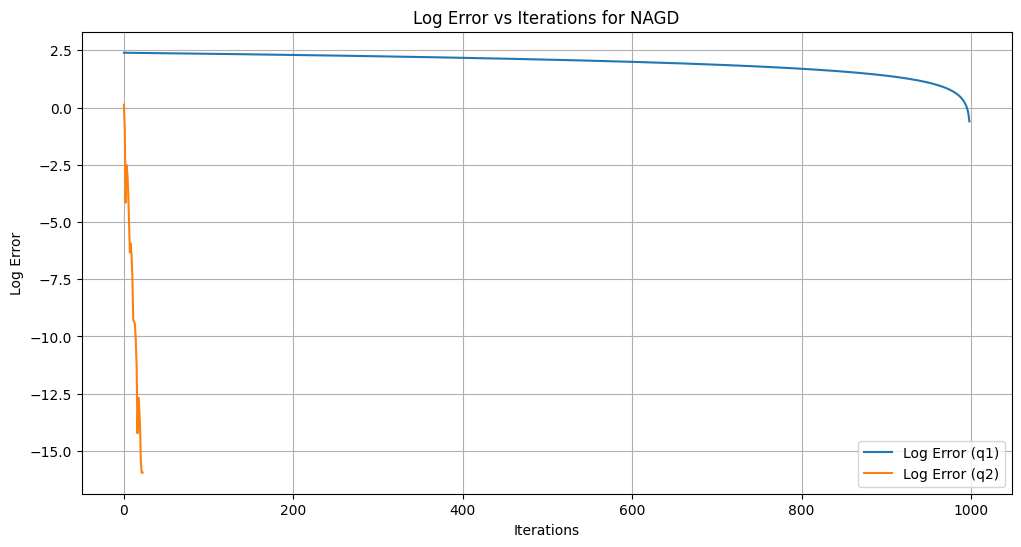

Results for q1(x):
Minimizer: [ 249.25 -248.75]
Final Function Value: -249.125
Results for q2(x):
Minimizer: [0.09090909 0.63636363]
Final Function Value: -0.6818181818181819


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions and gradients
def q1(x, W, b):
    return 0.5 * np.dot(x, np.dot(W, x)) - np.dot(b, x)

def grad_q1(x, W, b):
    return np.dot(W, x) - b

def q2(x, A, b):
    return 0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x)

def grad_q2(x, A, b):
    return np.dot(A, x) - b

# Nesterov's Accelerated Gradient Descent (NAGD)
def nesterov_accelerated_gradient_descent(grad_f, x0, alpha_k, beta_k, tau, max_iters, *args):
    x = np.array(x0, dtype=float)
    x_prev = x.copy()
    f_values = []

    for t in range(max_iters):
        if np.linalg.norm(grad_f(x, *args)) < tau:
            break

        # Compute gradient at perturbed point
        z = x + beta_k * (x - x_prev)
        grad = grad_f(z, *args)

        # Update parameters
        x_next = z - alpha_k * grad
        x_prev = x
        x = x_next

        # Store function value
        f_values.append(q1(x, *args) if grad_f == grad_q1 else q2(x, *args))

    return x, f_values

# Parameters for q1(x)
W = np.array([[1, np.sqrt(1)], [np.sqrt(1), 1]])
b1 = np.array([1, 0])
x0 = np.array([3, 5])

# Parameters for q2(x)
A = np.array([[4, 1], [1, 3]])
b2 = np.array([1, 2])

# Common parameters
tau = 1e-8
max_iters = 1000

# Step sizes and momentum
alpha_k_q1 = 2 / (3 + np.sqrt(9 - 4 * 2))
beta_k_q1 = (np.sqrt(9 - 4 * 2) - 1) / (np.sqrt(9 - 4 * 2) + 1)

alpha_k_q2 = 2 / (7 + np.sqrt(5))
beta_k_q2 = (np.sqrt(5) - 1) / (np.sqrt(5) + 1)

# Solve for q1(x) using NAGD
solution_q1, f_values_q1 = nesterov_accelerated_gradient_descent(
    grad_q1, x0, alpha_k_q1, beta_k_q1, tau, max_iters, W, b1
)

# Solve for q2(x) using NAGD
solution_q2, f_values_q2 = nesterov_accelerated_gradient_descent(
    grad_q2, x0, alpha_k_q2, beta_k_q2, tau, max_iters, A, b2
)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(np.log10(f_values_q1 - f_values_q1[-1]), label='Log Error (q1)')
plt.plot(np.log10(f_values_q2 - f_values_q2[-1]), label='Log Error (q2)')
plt.xlabel('Iterations')
plt.ylabel('Log Error')
plt.title('Log Error vs Iterations for NAGD')
plt.legend()
plt.grid()
plt.show()

print("Results for q1(x):")
print("Minimizer:", solution_q1)
print("Final Function Value:", f_values_q1[-1])

print("Results for q2(x):")
print("Minimizer:", solution_q2)
print("Final Function Value:", f_values_q2[-1])


<ipython-input-3-f22509bcdfea>:48: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_errors.append(100 * abs(f_values[-1] - theoretical_minimum) / theoretical_minimum)


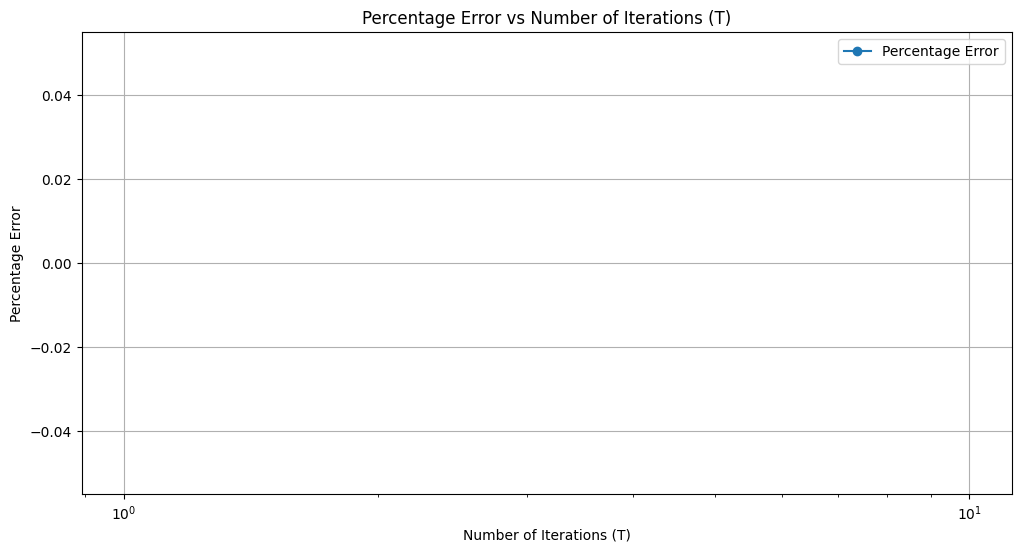

T = 100
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.757753
  Percentage Error: inf%

T = 500
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.757753
  Percentage Error: inf%

T = 1000
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.757753
  Percentage Error: inf%

T = 5000
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.757753
  Percentage Error: inf%

T = 10000
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.757753
  Percentage Error: inf%

T = 50000
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.757753
  Percentage Error: inf%

T = 100000
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.757753
  Percentage Error: inf%

T = 500000
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.757753
  Percentage Error: inf%

T = 1000000
  Final Minimizer: [-0.84274164  0.53831824]
  Final Objective Value: 4.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and gradient
def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (0.5 - x[0])**2

def grad_f(x):
    grad = np.zeros_like(x)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (0.5 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad

# Projection onto the L2 ball
def project_onto_l2_ball(x):
    norm = np.linalg.norm(x)
    return x if norm <= 1 else x / norm

# Implement Algorithm 4 (Projected Gradient Descent)
def projected_gradient_descent(f, grad_f, x0, eta, T):
    x = np.array(x0, dtype=float)
    f_values = []

    for _ in range(T):
        grad = grad_f(x)
        x -= eta * grad
        x = project_onto_l2_ball(x)  # Project onto the constraint set
        f_values.append(f(x))

    return x, f_values

# Parameters
x0 = [0, 0]
eta = 0.3
T_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]

theoretical_minimum = f([0.5, 0.25])  # Theoretical minimum value

# Solve and analyze results
final_minimizers = []
final_objective_values = []
percentage_errors = []

for T in T_values:
    minimizer, f_values = projected_gradient_descent(f, grad_f, x0, eta, T)
    final_minimizers.append(minimizer)
    final_objective_values.append(f_values[-1])
    percentage_errors.append(100 * abs(f_values[-1] - theoretical_minimum) / theoretical_minimum)

# Plot percentage error vs T
plt.figure(figsize=(12, 6))
plt.plot(T_values, percentage_errors, marker='o', label='Percentage Error')
plt.xscale('log')
plt.xlabel('Number of Iterations (T)')
plt.ylabel('Percentage Error')
plt.title('Percentage Error vs Number of Iterations (T)')
plt.legend()
plt.grid()
plt.show()

# Print results
for i, T in enumerate(T_values):
    print(f"T = {T}")
    print(f"  Final Minimizer: {final_minimizers[i]}")
    print(f"  Final Objective Value: {final_objective_values[i]:.6f}")
    print(f"  Percentage Error: {percentage_errors[i]:.6f}%\n")


<ipython-input-4-9067ab6dd6ca>:54: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(f_values_q2 - f_values_q2[-1]), label='Log Error (q2)')


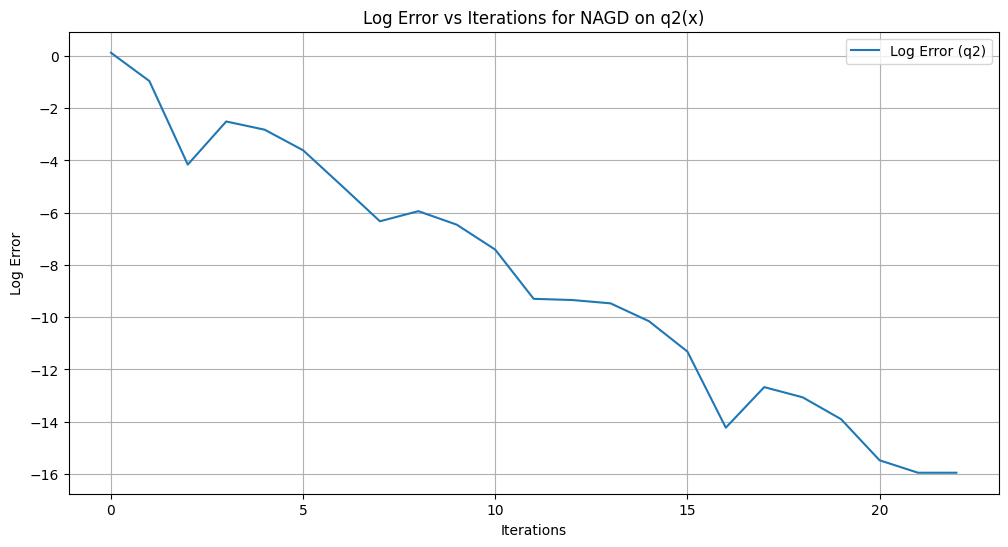

Results for q2(x):
Minimizer: [0.09090909 0.63636363]
Final Function Value: -0.6818181818181819


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define q2(x) and its gradient
def q2(x, A, b):
    return 0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x)

def grad_q2(x, A, b):
    return np.dot(A, x) - b

# Nesterov's Accelerated Gradient Descent (NAGD)
def nesterov_accelerated_gradient_descent_q2(grad_q2, x0, alpha_k, beta_k, tau, max_iters, A, b):
    x = np.array(x0, dtype=float)
    x_prev = x.copy()
    f_values = []

    for t in range(max_iters):
        if np.linalg.norm(grad_q2(x, A, b)) < tau:
            break

        # Compute gradient at perturbed point
        z = x + beta_k * (x - x_prev)
        grad = grad_q2(z, A, b)

        # Update parameters
        x_next = z - alpha_k * grad
        x_prev = x
        x = x_next

        # Store function value
        f_values.append(q2(x, A, b))

    return x, f_values

# Parameters for q2(x)
A = np.array([[4, 1], [1, 3]])
b2 = np.array([1, 2])
x0 = np.array([3, 5])

tau = 1e-8
max_iters = 1000

# Step sizes and momentum
alpha_k_q2 = 2 / (7 + np.sqrt(5))
beta_k_q2 = (np.sqrt(5) - 1) / (np.sqrt(5) + 1)

# Solve for q2(x) using NAGD
solution_q2, f_values_q2 = nesterov_accelerated_gradient_descent_q2(
    grad_q2, x0, alpha_k_q2, beta_k_q2, tau, max_iters, A, b2
)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(np.log10(f_values_q2 - f_values_q2[-1]), label='Log Error (q2)')
plt.xlabel('Iterations')
plt.ylabel('Log Error')
plt.title('Log Error vs Iterations for NAGD on q2(x)')
plt.legend()
plt.grid()
plt.show()

print("Results for q2(x):")
print("Minimizer:", solution_q2)
print("Final Function Value:", f_values_q2[-1])


<ipython-input-5-daff60faf974>:74: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(f_values_nagd - f_values_nagd[-1]), label='Log Error (NAGD)')
<ipython-input-5-daff60faf974>:75: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(f_values_cg - f_values_cg[-1]), label='Log Error (CG)')


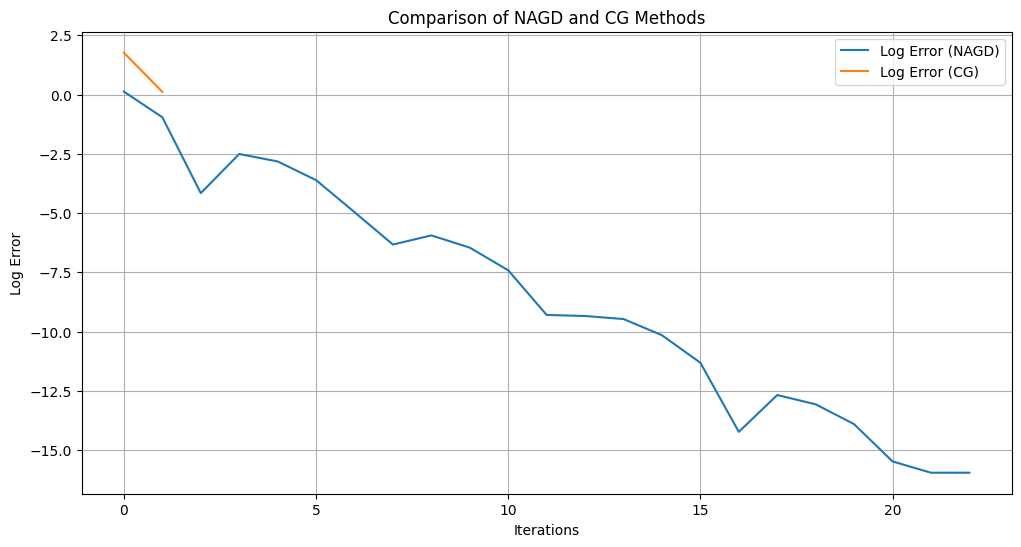

Results for NAGD:
Minimizer: [0.09090909 0.63636363]
Final Function Value: -0.6818181818181819

Results for Conjugate Gradient:
Minimizer: [0.09090909 0.63636364]
Final Function Value: -0.681818181818182


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define q2(x) and its gradient
def q2(x, A, b):
    return 0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x)

def grad_q2(x, A, b):
    return np.dot(A, x) - b

# Nesterov's Accelerated Gradient Descent (NAGD)
def nesterov_accelerated_gradient_descent(grad_f, x0, alpha_k, beta_k, tau, max_iters, A, b):
    x = np.array(x0, dtype=float)
    x_prev = x.copy()
    f_values = []

    for t in range(max_iters):
        if np.linalg.norm(grad_f(x, A, b)) < tau:
            break

        z = x + beta_k * (x - x_prev)
        grad = grad_f(z, A, b)

        x_next = z - alpha_k * grad
        x_prev = x
        x = x_next

        f_values.append(q2(x, A, b))

    return x, f_values

# Conjugate Gradient Method
def conjugate_gradient(grad_f, x0, tau, max_iters, A, b):
    x = np.array(x0, dtype=float)
    r = -grad_f(x, A, b)
    d = r.copy()
    f_values = [q2(x, A, b)]

    for _ in range(max_iters):
        if np.linalg.norm(r) < tau:
            break

        alpha = np.dot(r, r) / np.dot(d, np.dot(A, d))
        x = x + alpha * d
        r_new = r - alpha * np.dot(A, d)

        beta = np.dot(r_new, r_new) / np.dot(r, r)
        d = r_new + beta * d
        r = r_new

        f_values.append(q2(x, A, b))

    return x, f_values

# Parameters for q2(x)
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])
x0 = np.array([3, 5])
tau = 1e-8
max_iters = 100

# NAGD parameters
alpha_k = 2 / (7 + np.sqrt(5))
beta_k = (np.sqrt(5) - 1) / (np.sqrt(5) + 1)

# Solve using NAGD
solution_nagd, f_values_nagd = nesterov_accelerated_gradient_descent(grad_q2, x0, alpha_k, beta_k, tau, max_iters, A, b)

# Solve using Conjugate Gradient
solution_cg, f_values_cg = conjugate_gradient(grad_q2, x0, tau, max_iters, A, b)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(np.log10(f_values_nagd - f_values_nagd[-1]), label='Log Error (NAGD)')
plt.plot(np.log10(f_values_cg - f_values_cg[-1]), label='Log Error (CG)')
plt.xlabel('Iterations')
plt.ylabel('Log Error')
plt.title('Comparison of NAGD and CG Methods')
plt.legend()
plt.grid()
plt.show()

# Print results
print("Results for NAGD:")
print("Minimizer:", solution_nagd)
print("Final Function Value:", f_values_nagd[-1])

print("\nResults for Conjugate Gradient:")
print("Minimizer:", solution_cg)
print("Final Function Value:", f_values_cg[-1])
